Memasukkan library pandas

In [1]:
import pandas as pd

Memasukkan Dataset Melalui Kaggle

In [2]:
pip install -q kaggle

In [3]:
mkdir ~/.kaggle

In [31]:
from google.colab import files
files.upload()

{}

In [6]:
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d denisadutca/customer-behaviour

  0% 0.00/3.27k [00:00<?, ?B/s]
100% 3.27k/3.27k [00:00<00:00, 8.51MB/s]


In [8]:
!unzip customer-behaviour.zip

Archive:  customer-behaviour.zip
  inflating: Customer_Behaviour.csv  


Membuat variable data untuk memasukkan dataset

In [9]:
data = pd.read_csv('Customer_Behaviour.csv')

Membaca kolom dan baris

In [10]:
data.shape

(400, 5)

In [11]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


Membuat library

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

Melihat type data pada dataset customer_behavior

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Membuat fungsi drop_data yang fungsi di dalamnya untuk mengahpus colom User ID

In [15]:
def drop_data():
  print("Memproses Drop Kolom Yang Tidak Diperlukan")
  global data
  data = data.drop(columns=['User ID'])
  time.sleep(5)
  print("Proses Drop Kolom Berhasil")

Menjalankan fungsi drop_data

In [16]:
drop_data()

Memproses Drop Kolom Yang Tidak Diperlukan
Proses Drop Kolom Berhasil


melihat isi data, setelah di lakukan perubahan

In [17]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


"data.iloc[:, 1:3]" digunakan untuk memilih kolom pertama hingga kolom ketiga.
Mencetak isi dari variabel "data_clus"

In [18]:
data_clus = data.iloc[:, 1:3]
print(data_clus)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


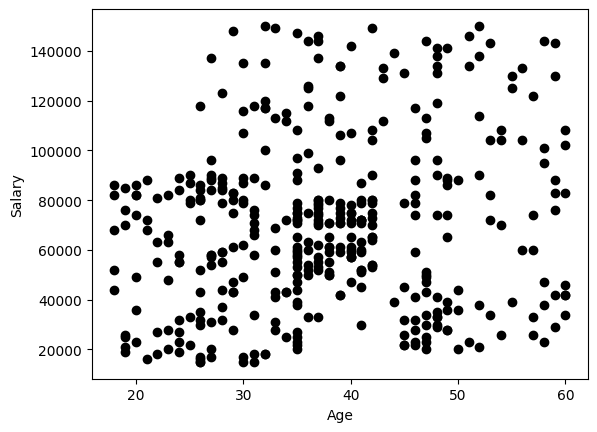

In [19]:
plt.scatter(data_clus.iloc[:, 0], data_clus.iloc[:, 1], c='black')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [20]:
clus_array = data_clus.values
print(clus_array)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [21]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(clus_array)
print(data_scaled)

[[0.02380952 0.02962963]
 [0.4047619  0.03703704]
 [0.19047619 0.20740741]
 [0.21428571 0.31111111]
 [0.02380952 0.45185185]
 [0.21428571 0.31851852]
 [0.21428571 0.51111111]
 [0.33333333 1.        ]
 [0.16666667 0.13333333]
 [0.4047619  0.37037037]
 [0.19047619 0.48148148]
 [0.19047619 0.27407407]
 [0.04761905 0.52592593]
 [0.33333333 0.02222222]
 [0.         0.4962963 ]
 [0.26190476 0.48148148]
 [0.69047619 0.07407407]
 [0.64285714 0.08148148]
 [0.66666667 0.0962963 ]
 [0.71428571 0.1037037 ]
 [0.64285714 0.05185185]
 [0.69047619 0.25185185]
 [0.71428571 0.19259259]
 [0.64285714 0.05185185]
 [0.66666667 0.05925926]
 [0.69047619 0.03703704]
 [0.73809524 0.0962963 ]
 [0.69047619 0.11111111]
 [0.26190476 0.20740741]
 [0.30952381 0.02222222]
 [0.30952381 0.43703704]
 [0.21428571 0.9037037 ]
 [0.07142857 0.00740741]
 [0.23809524 0.21481481]
 [0.21428571 0.55555556]
 [0.4047619  0.08888889]
 [0.35714286 0.0962963 ]
 [0.28571429 0.25185185]
 [0.19047619 0.42222222]
 [0.21428571 0.11851852]


Visualisasi elbow menggunakan Yellowbrick

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

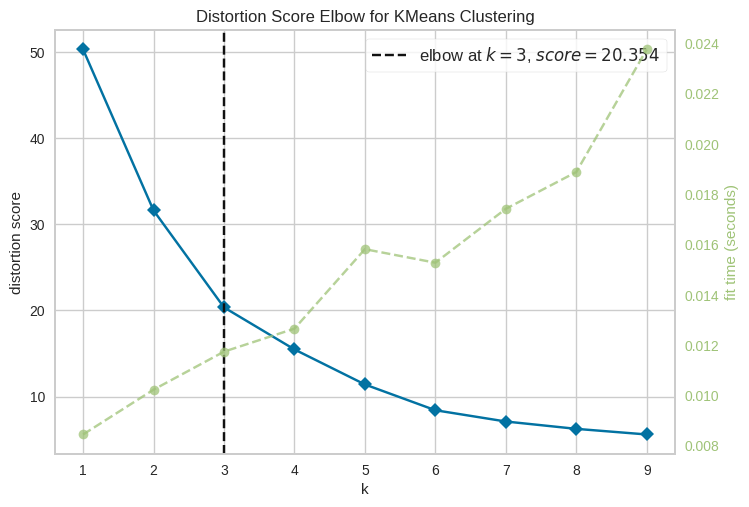

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# Initialize the KMeans model and KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(data_scaled)
visualizer.show()

In [24]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
y_kmeans = kmeanModel.labels_
print(kmeanModel.cluster_centers_)

[[0.66804693 0.30042941]
 [0.58478513 0.79467028]
 [0.26137566 0.30876543]]


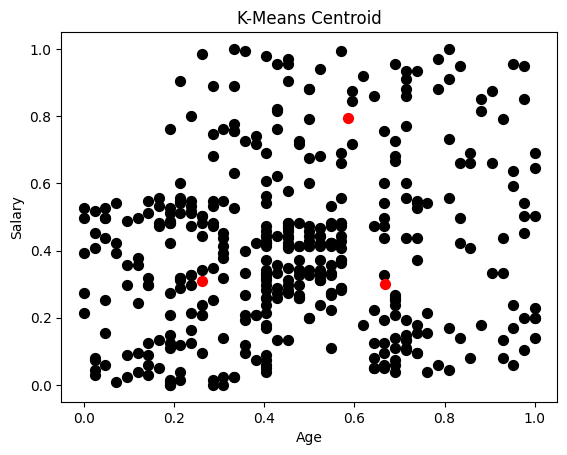

In [26]:
plt.scatter(data_scaled[:,0],data_scaled[:,1], s=50, c='black', marker ='o', alpha=1)
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='red', s=50, alpha=1, marker='o');
plt.title('K-Means Centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

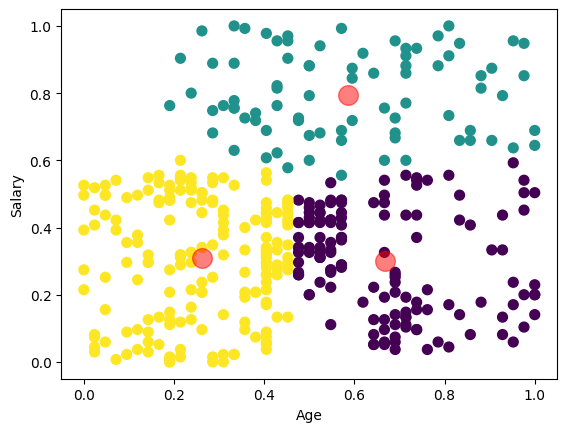

In [27]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [28]:
result = pd.DataFrame(data=y_kmeans)
result.columns = ['cluster']
result.head()

,cluster
0,2
1,2
2,2
3,2
4,2


In [29]:
output = pd.concat([data, result], axis=1)
output.head()

,Gender,Age,EstimatedSalary,Purchased,cluster
0,Male,19,19000,0,2
1,Male,35,20000,0,2
2,Female,26,43000,0,2
3,Female,27,57000,0,2
4,Male,19,76000,0,2


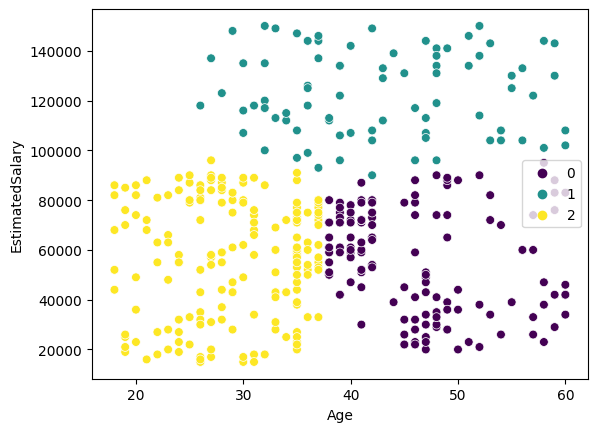

In [30]:
import seaborn as sns

sns.scatterplot(x=output.iloc[:, 1], y=output.iloc[:, 2], hue=output.iloc[:, 4], palette='viridis', s=40)
plt.legend(loc='center right', fontsize='10')
plt.show()